In [35]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import tree
warnings.filterwarnings('ignore')


In [4]:
data=pd.read_csv('/home/sri/jupy/ML/drug200.csv')

In [5]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [6]:

data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [7]:
len(data.columns)

6

In [8]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [9]:
data.Age.unique()

array([23, 47, 28, 61, 22, 49, 41, 60, 43, 34, 74, 50, 16, 69, 32, 57, 63,
       48, 33, 31, 39, 45, 18, 65, 53, 46, 15, 73, 58, 66, 37, 68, 67, 62,
       24, 26, 40, 38, 29, 17, 54, 70, 36, 19, 64, 59, 51, 42, 56, 20, 72,
       35, 52, 55, 30, 21, 25])

In [10]:
data.Sex.unique()

array(['F', 'M'], dtype=object)

In [11]:
data.BP.unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [12]:
data.Cholesterol.unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [13]:
data.Na_to_K.unique()

array([25.355, 13.093, 10.114,  7.798, 18.043,  8.607, 16.275, 11.037,
       15.171, 19.368, 11.767, 19.199, 15.376, 20.942, 12.703, 15.516,
       11.455, 13.972,  7.298, 25.974, 19.128, 25.917, 30.568, 15.036,
       33.486, 18.809, 30.366,  9.381, 22.697, 17.951,  8.75 ,  9.567,
       11.014, 31.876, 14.133,  7.285,  9.445, 13.938,  9.709,  9.084,
       19.221, 14.239, 15.79 , 12.26 , 12.295,  8.107, 13.091, 10.291,
       31.686, 19.796, 19.416, 10.898, 27.183, 18.457, 10.189, 14.16 ,
       11.34 , 27.826, 10.091, 18.703, 29.875,  9.475, 20.693,  8.37 ,
       13.303, 27.05 , 12.856, 10.832, 24.658, 24.276, 13.967, 19.675,
       10.605, 22.905, 17.069, 20.909, 11.198, 19.161, 13.313, 10.84 ,
       13.934,  7.761,  9.712, 11.326, 10.067, 13.935, 13.597, 15.478,
       23.091, 17.211, 16.594, 15.156, 29.45 , 29.271, 15.015, 11.424,
       38.247, 25.395, 35.639, 16.725, 11.871, 12.854, 13.127,  8.966,
       28.294,  8.968, 11.953, 20.013,  9.677, 16.85 ,  7.49 ,  6.683,
      

In [14]:
data.Drug.unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [15]:
import numpy as np

def gini_index(groups, classes):
    # Calculate the total number of samples at the split point
    total_samples = sum([len(group) for group in groups])

    # Initialize the Gini Index to 0
    gini = 0.0

    # Calculate the Gini Index for each group
    for group in groups:
        group_size = len(group)
        if group_size == 0:
            continue
        score = 0.0
        # Calculate the score for each class in the group
        for class_val in classes:
            proportion = [row[-1] for row in group].count(class_val) / group_size
            score += proportion ** 2
        # Weight the group score by its relative size
        gini += (1.0 - score) * (group_size / total_samples)

    return gini


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [17]:
len(data.Drug.unique())

5

In [18]:
data.isnull().sum()
#check the null values

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [19]:
# encode sex column

In [20]:
# assign numerical values to labels
from sklearn import preprocessing
le_Sex = preprocessing.LabelEncoder()
le_Sex.fit(['F', 'M'])
data['Sex'] = le_Sex.fit_transform(data['Sex'])# transform sex column

In [21]:
# @title Default title text
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,HIGH,HIGH,25.355,drugY
1,47,1,LOW,HIGH,13.093,drugC
2,47,1,LOW,HIGH,10.114,drugC
3,28,0,NORMAL,HIGH,7.798,drugX
4,61,0,LOW,HIGH,18.043,drugY


In [22]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,HIGH,HIGH,25.355,drugY
1,47,1,LOW,HIGH,13.093,drugC
2,47,1,LOW,HIGH,10.114,drugC
3,28,0,NORMAL,HIGH,7.798,drugX
4,61,0,LOW,HIGH,18.043,drugY


In [23]:
data['Sex'].unique()

array([0, 1])

In [24]:
# encode BP column
le_BP = preprocessing.LabelEncoder()
le_BP.fit(data['BP'].unique())
data['BP'] = le_BP.fit_transform(data['BP'])#transform BP colum

In [25]:
data['BP'].unique()

array([0, 1, 2])

In [26]:
#encode Cholesterol column

In [27]:
le_Cholesterol = preprocessing.LabelEncoder()
le_Cholesterol.fit(data['Cholesterol'].unique())
data['Cholesterol'] = le_Cholesterol.fit_transform(data['Cholesterol'])#transform Cholesterol column

In [28]:
data.sample(30)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
27,49,0,2,1,9.381,drugX
190,58,1,0,0,18.991,drugY
101,45,0,0,0,12.854,drugA
86,51,0,2,0,13.597,drugX
41,58,0,0,1,14.239,drugB
67,17,1,2,1,10.832,drugX
169,20,0,0,0,11.262,drugA
167,57,0,2,0,14.216,drugX
76,36,0,0,0,11.198,drugA
91,41,1,0,1,15.156,drugY


In [29]:
data['Cholesterol'].unique()

array([0, 1])

In [30]:
#seperate independent and dependent variables
x=data.drop('Drug',axis=1)
y=data['Drug']

In [31]:
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
...,...,...,...,...,...
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894
198,23,1,2,1,14.020


In [32]:
y.unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

**Decision** **Tree**

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=45)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

     Age  Sex  BP  Cholesterol  Na_to_K
161   57    0   0            1    9.945
34    53    1   2            0   14.133
114   20    0   2            1    9.281
94    56    1   1            0   15.015
159   34    0   1            1   12.923
..   ...  ...  ..          ...      ...
95    36    1   1            1   11.424
32    49    1   1            1   11.014
124   53    0   0            1   12.495
131   52    1   1            1   32.922
158   59    0   1            0   10.444

[134 rows x 5 columns]
     Age  Sex  BP  Cholesterol  Na_to_K
45    66    0   2            1    8.107
72    24    0   2            0   10.605
40    73    0   2            0   19.221
58    60    1   2            1   10.091
25    28    0   0            1   18.809
..   ...  ...  ..          ...      ...
113   65    0   1            1   13.769
76    36    0   0            0   11.198
115   51    1   0            0   18.295
90    62    1   2            0   16.594
139   69    0   2            0   10.065

[66 rows x 5 co

In [34]:
from sklearn.tree import DecisionTreeClassifier
Drug_classifier=DecisionTreeClassifier(criterion='entropy',max_depth=20)
#train
Drug_classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20)

In [264]:

y_pred=Drug_classifier.predict(x_test)

**Evaluate**

In [265]:

from sklearn import metrics
import matplotlib.pyplot as plt
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9696969696969697


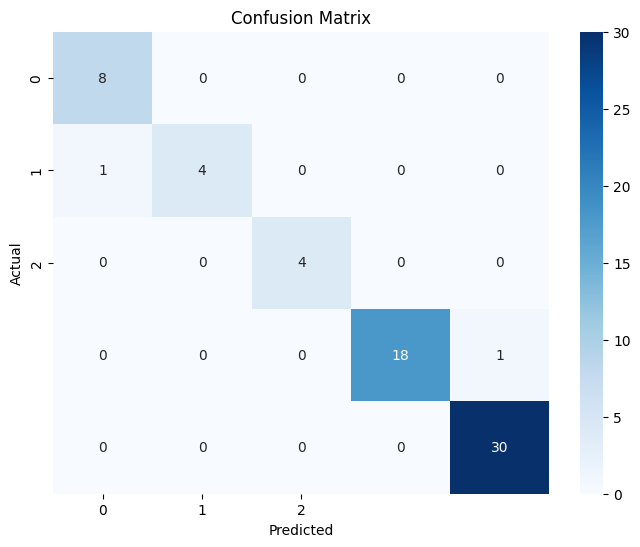

In [268]:

# Use the correct variable name that matches your model
y_pred = Drug_classifier.predict(x_test)
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1,2], yticklabels=[0, 1,2])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


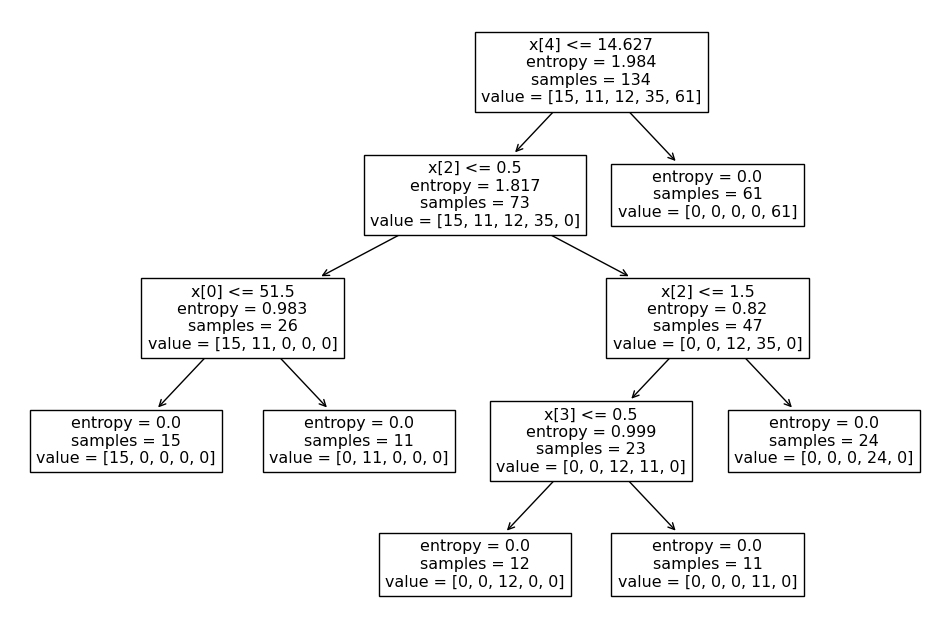

In [269]:

plt.figure(figsize=(12,8))
tree.plot_tree(Drug_classifier.fit(x_train, y_train))
plt.show()
